In [1]:
pip install lingam

In [1]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot, print_causal_directions, print_dagc

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

import pandas as pd

df_train = pd.read_csv('C:/Users/ACER/Documents/causal/csuite_mixed_confounding/train.csv')
df_test = pd.read_csv('C:/Users/ACER/Documents/causal/csuite_mixed_confounding/test.csv')

['1.26.4', '2.2.3', '0.20.3', '1.9.0']


In [2]:
model = lingam.VARLiNGAM()
model.fit(df_train)
model.fit(df_test)

In [3]:
model.causal_order_

[7, 0, 2, 9, 5, 4, 6, 3, 10, 1, 11, 8]

In [4]:
# B0
model.adjacency_matrices_[0]

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 1.046,  0.   , -0.344, -0.381, -0.324,  0.   ,  0.   ,  0.392,
         0.   ,  0.   , -0.104,  0.   ],
       [ 0.567,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 1.252,  0.   , -0.269,  0.   , -0.315, -0.261, -0.211,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.184,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.563,  0.   , -0.095,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 1.016,  0.   , -0.2  ,  0.   , -0.167, -0.213,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [-0.693,  0.612,  0.184,  0.24 ,  0.229,  0.   ,  0.   , -0.232,
         0.   ,  0.   , 

In [5]:
# B1
model.adjacency_matrices_[1]

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [-0.097,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [-0.115,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   , 

In [6]:
model.residuals_

array([[-0.623,  1.047, -0.286, ..., -1.669, -0.557, -1.603],
       [ 0.619, -1.341, -0.696, ...,  1.999,  0.997,  1.962],
       [-0.098, -0.85 ,  1.786, ..., -0.607,  0.923, -0.581],
       ...,
       [-0.547,  1.288, -0.062, ..., -0.024,  0.048, -1.409],
       [ 0.665,  1.3  ,  0.311, ...,  0.495,  0.34 , -0.473],
       [-0.457, -0.712,  0.076, ...,  0.616, -0.577, -0.365]])

In [7]:
dlingam = lingam.DirectLiNGAM()
dlingam.fit(model.residuals_)
dlingam.adjacency_matrix_

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.074,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 1.012,  0.   , -0.38 , -0.378, -0.367,  0.   ,  0.   ,  0.348,
         0.   ,  0.   , -0.111,  0.   ],
       [ 0.661,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.056,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 1.259,  0.   , -0.256,  0.   , -0.296, -0.251, -0.211,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.239,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.659,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.081,
         0.   , -0.044,  0.   ,  0.   ],
       [ 1.012,  0.   , -0.191,  0.   , -0.161, -0.206,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ],
       [-0.723,  0.595,  0.208,  0.246,  0.253,  0.085,  0.   , -0.201,
         0.   ,  0.   , 

In [8]:
true_adj = model.adjacency_matrices_[0]
inferred_adj = model.adjacency_matrices_[1]

In [9]:
from sklearn.metrics import confusion_matrix
# Function to compute SHD
def compute_shd(true_graph, estimated_graph):
    added_edges = np.sum((estimated_graph - true_graph) == 1)
    removed_edges = np.sum((estimated_graph - true_graph) == -1)
    return added_edges + removed_edges

# Function to compute SID
def compute_sid(true_graph, estimated_graph):
    true_edges = (true_graph != 0).astype(int)
    estimated_edges = (estimated_graph != 0).astype(int)
    return np.sum(np.abs(true_edges - estimated_edges))

# Function to compute FDR
def compute_fdr(true_graph, estimated_graph):
    tp = np.sum((true_graph == 1) & (estimated_graph == 1))  # True Positives
    fp = np.sum((true_graph == 0) & (estimated_graph == 1))  # False Positives
    return fp / (tp + fp) if (tp + fp) > 0 else 0

# Function to compute MCC
def compute_mcc(true_graph, estimated_graph):
    # Flatten the matrices for binary classification
    y_true = (true_graph != 0).flatten()
    y_pred = (estimated_graph != 0).flatten()
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    mcc = (tp * tn - fp * fn) / np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) if (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn) > 0 else 0
    return mcc

In [10]:
shd = compute_shd(true_adj, inferred_adj)
sid = compute_sid(true_adj, inferred_adj)
fdr = compute_fdr(true_adj, inferred_adj)
mcc = compute_mcc(true_adj, inferred_adj)

# Print results
print(f"SHD: {shd}")
print(f"SID: {sid}")
print(f"FDR: {fdr:.3f}")
print(f"MCC: {mcc:.3f}")

SHD: 0
SID: 29
FDR: 0.000
MCC: 0.088


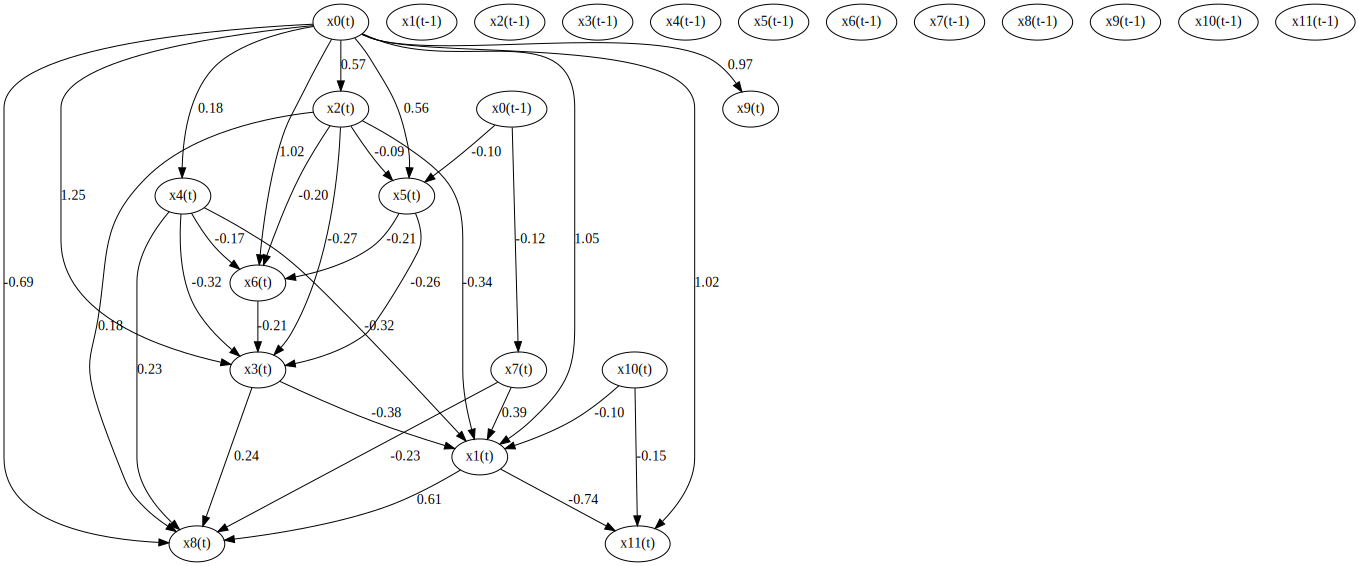

In [20]:
labels = ['x' + str(i) + '(t)' for i in range(12)] + ['x' + str(i) + '(t-1)' for i in range(12)]
make_dot(np.hstack(model.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)